In [4]:
import datetime as dt

dt.datetime.strptime("2013-02-08", "%Y-%m-%d").date() - dt.date(2012, 8, 13)
dt.date(2016,4,9) - dt.date(2013,4,10)

datetime.timedelta(days=1095)

In [1]:
from src.environments.market import Market

m = Market("2013-04-08", "2013-04-10", 3)
m.data.shape

(16, 5, 5)

In [2]:
a,b = m.step()
print(a[0,:,:], a[1,:,:], b)
print(m.next_step, m.step_to_date())

ValueError: not enough values to unpack (expected 4, got 2)

<Figure size 432x288 with 0 Axes>

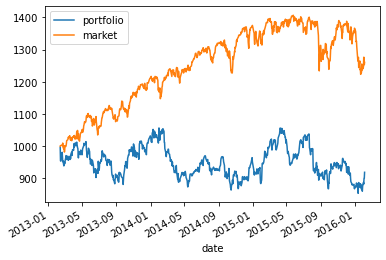

In [11]:
from src.environments.portfolio import Portfolio
import numpy as np

p = Portfolio("2013-02-12", "2016-02-05", 3)
p.market.data.shape

p.reset()
while True:
    #action = np.random.rand(17)
    action = -1000000 * np.ones(17)
    action[3] = 1000000
    a,b,c,d = p.step(action)
    if d:
        break

p.render()

(15744.0, 16838.0)

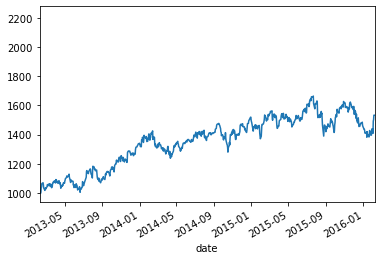

In [12]:
import pandas as pd

a = pd.read_csv('data/CMCSA_data.csv')
a['date'] = pd.to_datetime(a['date'], format='%Y-%m-%d')
a.set_index('date', inplace=True)
a['close'] = a['close'].apply(lambda x : x / a.iloc[0]['close'] * 1000)
ax = a['close'].plot()
ax.set_xlim(pd.Timestamp('2013-02-08'), pd.Timestamp('2016-02-07'))